# Cambridge Sanitary Inspections Project

This project is based on the [Cambridge Open Data Program Civic Innovation Challenge Inventory](https://data.cambridgema.gov/General-Government/Civic-Innovation-Challenge-Inventory/x96z-hdnh/about_data). Data comes from the [Sanitary Inspections dataset](https://data.cambridgema.gov/Inspectional-Services/Sanitary-Inspections/ryb9-qzmw/about_data) and the question to be answered based on the dataset is: 

<blockquote>
How can Cambridge better utilize and present this data to protect public health and safety and improve community access to inspection information?
</blockquote>

Each row in the dataset is an inspection result. This exploratory data analysis (EDA) is in preparation with building a Tableau dashboard to address this question. The project is not intended to ridicule or diminish any particular establishment, but rather to educate the City of Cambridge and its residents. For more information on sanitary codes, see food sanitary codes for Massachusetts: [105 CMR 590.00: State sanitary code chapter X: Minimum sanitation standards for food establishments)
](https://www.mass.gov/doc/merged-food-code-111618/download)

The steps in this notebook are as follows:
1. [Pull data through the dataset API](#step_1)
2. [Clean and filter data](#step_2)
3. [Conduct EDA to begin answering question](#step_3)
4. [Summary and Recommendations](#step_4)
5. [Create Tableau dashboard](#step_5)

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
# import datetime as dt

import requests
import json

# Set column width so can display full text in columns for easier readability
pd.set_option('display.max_colwidth', None)

## 1. Extract Data from API <a id='step_1'></a>

From [API Documentation](https://dev.socrata.com/foundry/data.cambridgema.gov/ryb9-qzmw)

Limit is set to 500,000 due to the default limit being 1,000 rows and since we have no application token, we are limited to the number of requests that can be made. Currently, the number of rows in the dataset is less than the limit we are setting.

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cambridgema.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cambridgema.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ryb9-qzmw", limit=500000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,code_case_status,geocoded_column,:@computed_region_guic_hr4a,:@computed_region_v7jj_366k,:@computed_region_rffn_qbt6,:@computed_region_swkg_bavi,:@computed_region_e4yd_rwk4,date_corrected
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18T00:00:00.000,2021-10-18T00:00:00.000,2021-10-18T00:00:00.000,Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,163758,"699 Mt Auburn St, Cambridge, MA 02138",252-172,AFC SUSHI @ STAR MARKET #2565,,,2022-02-17T00:00:00.000,2022-03-15T00:00:00.000,2022-02-17T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.148745, 42.375065]}",2,36,12,62,879,NaN
2,165272,,,Guckenheimer @ Takeda Cambridge 500 Coffee Bar,,,2022-03-01T00:00:00.000,2022-03-08T00:00:00.000,2022-03-01T00:00:00.000,Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,168842,"983 Massachusetts Ave, Cambridge, MA 02138",116-94,SAKANA,,,2022-03-31T00:00:00.000,2022-04-14T00:00:00.000,2022-03-31T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.110815, 42.3693]}",10,64,6,109,224,NaN
4,173026,,,Tenoch,,,2022-04-29T00:00:00.000,2022-05-02T00:00:00.000,2022-04-29T00:00:00.000,Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,215638,"305 Memorial Dr, Cambridge, MA 02139",58-161,Howard Dining Hall at Maseeh,3-501.17,Date Marking,2023-03-22T00:00:00.000,2023-05-10T00:00:00.000,2023-03-22T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.093439, 42.357664]}",5,86,3,271,66,2023-05-10T00:00:00.000
6448,228911,"8-1/2 Eliot St, Cambridge, MA 02138",162-17,Falafel Corner,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2023-06-15T00:00:00.000,2023-07-21T00:00:00.000,2023-06-15T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.121545, 42.372528]}",12,103,12,197,670,2023-07-20T00:00:00.000
6449,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-903.11-.12,"Equipment, Utensils, Linens and Single-Service/Use Articles-Storing & Prohibitions",2022-07-07T00:00:00.000,2022-09-07T00:00:00.000,NaN,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",9,100,9,14,545,2022-08-25T00:00:00.000
6450,207369,"1312 Massachusetts Ave, Cambridge, MA 02138",160-25,"J.P. Licks at Harvard Square, Inc.",6-501.114,"Maintaining Premises, Unnecessary Items and Litter",2023-01-09T00:00:00.000,2023-01-17T00:00:00.000,2023-01-09T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.11751, 42.372894]}",13,106,5,197,738,2023-01-17T00:00:00.000


### Get basic information about the dataset

In [3]:
# Identify number of rows and columns in dataset
total_rows = len(results_df)
total_cols = len(results_df.columns)
print(f"Total rows in dataset: {total_rows}")
print(f"Total columns in dataset: {total_cols}")

Total rows in dataset: 6452
Total columns in dataset: 17


In [4]:
# Get list of columns names
results_df.columns

Index(['case_number', 'address', 'parcel', 'establishment_name', 'code_number',
       'code_description', 'case_open_date', 'case_closed_date', 'date_cited',
       'code_case_status', 'geocoded_column', ':@computed_region_guic_hr4a',
       ':@computed_region_v7jj_366k', ':@computed_region_rffn_qbt6',
       ':@computed_region_swkg_bavi', ':@computed_region_e4yd_rwk4',
       'date_corrected'],
      dtype='object')

In [50]:
# Get earliest and latest records available
print(f"Earliest case open date: {results_df['case_open_date'].min()}")
print(f"Latest case open date: {results_df['case_open_date'].max()}")

Earliest case open date: 2021-05-12T00:00:00.000
Latest case open date: 2024-03-19T00:00:00.000


## 2. Clean and Filter Data <a id='step_2'></a>

Since we are intersted in the actual violations, we create a table that will only include rows where a sanitary violation citation was given. A citation was issued if a code number appears in the code_number field ([Citation: Sanitary Inspections Dataset](https://data.cambridgema.gov/Inspectional-Services/Sanitary-Inspections/ryb9-qzmw/about_data))

### Get only rows with violation citations issued

In [5]:
violations_df = results_df[results_df['code_number'] != '']
violations_df

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,code_case_status,geocoded_column,:@computed_region_guic_hr4a,:@computed_region_v7jj_366k,:@computed_region_rffn_qbt6,:@computed_region_swkg_bavi,:@computed_region_e4yd_rwk4,date_corrected
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18T00:00:00.000,2021-10-18T00:00:00.000,2021-10-18T00:00:00.000,Complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,174315,"52 Brattle St, Cambridge, MA 02138",168-64,Toscano,4-501.12,Cutting Surfaces,2022-05-09T00:00:00.000,2022-06-06T00:00:00.000,2022-05-09T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.121933, 42.374293]}",12,102,12,74,668,2022-06-06T00:00:00.000
9,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-07-07T00:00:00.000,2022-09-07T00:00:00.000,NaN,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",9,100,9,14,545,2022-08-25T00:00:00.000
17,194214,,,Black Sheep Bagel Cafe,3-304.14,"Wiping Cloths, Use Limitation",2022-09-08T00:00:00.000,2022-09-08T00:00:00.000,2022-09-08T00:00:00.000,Complete,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-08T00:00:00.000
18,195184,"1722 Massachusetts Ave, Cambridge, MA 02138",175-75,Poke City,590.009(G),Food Allergy Awareness Requirements,2022-09-15T00:00:00.000,2022-11-14T00:00:00.000,2022-09-15T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.119687, 42.383908]}",8,23,2,31,720,2022-10-24T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,215638,"305 Memorial Dr, Cambridge, MA 02139",58-161,Howard Dining Hall at Maseeh,3-501.17,Date Marking,2023-03-22T00:00:00.000,2023-05-10T00:00:00.000,2023-03-22T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.093439, 42.357664]}",5,86,3,271,66,2023-05-10T00:00:00.000
6448,228911,"8-1/2 Eliot St, Cambridge, MA 02138",162-17,Falafel Corner,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2023-06-15T00:00:00.000,2023-07-21T00:00:00.000,2023-06-15T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.121545, 42.372528]}",12,103,12,197,670,2023-07-20T00:00:00.000
6449,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-903.11-.12,"Equipment, Utensils, Linens and Single-Service/Use Articles-Storing & Prohibitions",2022-07-07T00:00:00.000,2022-09-07T00:00:00.000,NaN,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",9,100,9,14,545,2022-08-25T00:00:00.000
6450,207369,"1312 Massachusetts Ave, Cambridge, MA 02138",160-25,"J.P. Licks at Harvard Square, Inc.",6-501.114,"Maintaining Premises, Unnecessary Items and Litter",2023-01-09T00:00:00.000,2023-01-17T00:00:00.000,2023-01-09T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.11751, 42.372894]}",13,106,5,197,738,2023-01-17T00:00:00.000


In [6]:
# Percent of dataset with violations
total_violations = len(violations_df)
percent_violations = len(violations_df)/len(results_df)
print(f"Total violations in dataset: {total_violations}")
print(f"Percent of dataset containing violations: {percent_violations*100}%")

Total violations in dataset: 5113
Percent of dataset containing violations: 79.24674519528828%


### Find datatypes of columns in dataset

In [7]:
violations_df.applymap(type)

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,code_case_status,geocoded_column,:@computed_region_guic_hr4a,:@computed_region_v7jj_366k,:@computed_region_rffn_qbt6,:@computed_region_swkg_bavi,:@computed_region_e4yd_rwk4,date_corrected
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>
5,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
9,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
17,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
18,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6447,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
6448,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
6449,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
6450,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


### Change case numbers into numeric values to make lookup easier

In [8]:
violations_df['case_number'] = violations_df['case_number'].astype(int)

type(violations_df['case_number'][0])

/var/folders/fx/jwtj53fn36b_tps11wdpv45r0000gn/T/ipykernel_19560/1482229116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violations_df['case_number'] = violations_df['case_number'].astype(int)


numpy.int64

### Drop uncessary columns 
These columns do not have any documentation on the [Sanitary Inspections Dataset](https://data.cambridgema.gov/Inspectional-Services/Sanitary-Inspections/ryb9-qzmw/about_data) website, so we will drop them

In [9]:
violations_df = violations_df.drop([':@computed_region_guic_hr4a',
       ':@computed_region_v7jj_366k', ':@computed_region_rffn_qbt6',
       ':@computed_region_swkg_bavi', ':@computed_region_e4yd_rwk4'], axis=1)

violations_df

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,code_case_status,geocoded_column,date_corrected
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18T00:00:00.000,2021-10-18T00:00:00.000,2021-10-18T00:00:00.000,Complete,NaN,NaN
5,174315,"52 Brattle St, Cambridge, MA 02138",168-64,Toscano,4-501.12,Cutting Surfaces,2022-05-09T00:00:00.000,2022-06-06T00:00:00.000,2022-05-09T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.121933, 42.374293]}",2022-06-06T00:00:00.000
9,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-07-07T00:00:00.000,2022-09-07T00:00:00.000,NaN,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",2022-08-25T00:00:00.000
17,194214,,,Black Sheep Bagel Cafe,3-304.14,"Wiping Cloths, Use Limitation",2022-09-08T00:00:00.000,2022-09-08T00:00:00.000,2022-09-08T00:00:00.000,Complete,NaN,2022-09-08T00:00:00.000
18,195184,"1722 Massachusetts Ave, Cambridge, MA 02138",175-75,Poke City,590.009(G),Food Allergy Awareness Requirements,2022-09-15T00:00:00.000,2022-11-14T00:00:00.000,2022-09-15T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.119687, 42.383908]}",2022-10-24T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...
6447,215638,"305 Memorial Dr, Cambridge, MA 02139",58-161,Howard Dining Hall at Maseeh,3-501.17,Date Marking,2023-03-22T00:00:00.000,2023-05-10T00:00:00.000,2023-03-22T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.093439, 42.357664]}",2023-05-10T00:00:00.000
6448,228911,"8-1/2 Eliot St, Cambridge, MA 02138",162-17,Falafel Corner,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2023-06-15T00:00:00.000,2023-07-21T00:00:00.000,2023-06-15T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.121545, 42.372528]}",2023-07-20T00:00:00.000
6449,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-903.11-.12,"Equipment, Utensils, Linens and Single-Service/Use Articles-Storing & Prohibitions",2022-07-07T00:00:00.000,2022-09-07T00:00:00.000,NaN,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",2022-08-25T00:00:00.000
6450,207369,"1312 Massachusetts Ave, Cambridge, MA 02138",160-25,"J.P. Licks at Harvard Square, Inc.",6-501.114,"Maintaining Premises, Unnecessary Items and Litter",2023-01-09T00:00:00.000,2023-01-17T00:00:00.000,2023-01-09T00:00:00.000,Complete,"{'type': 'Point', 'coordinates': [-71.11751, 42.372894]}",2023-01-17T00:00:00.000


### Clean date columns 
Since date columns are strings, convert to datetime

In [10]:
# Convert date columns to datetime
date_cols = ['case_open_date', 'case_closed_date', 'date_cited', 'date_corrected']

for col in date_cols:
    violations_df[col] = pd.to_datetime(violations_df[col])#.dt.date

    
violations_df

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,code_case_status,geocoded_column,date_corrected
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,Complete,NaN,NaT
5,174315,"52 Brattle St, Cambridge, MA 02138",168-64,Toscano,4-501.12,Cutting Surfaces,2022-05-09,2022-06-06,2022-05-09,Complete,"{'type': 'Point', 'coordinates': [-71.121933, 42.374293]}",2022-06-06
9,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-07-07,2022-09-07,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",2022-08-25
17,194214,,,Black Sheep Bagel Cafe,3-304.14,"Wiping Cloths, Use Limitation",2022-09-08,2022-09-08,2022-09-08,Complete,NaN,2022-09-08
18,195184,"1722 Massachusetts Ave, Cambridge, MA 02138",175-75,Poke City,590.009(G),Food Allergy Awareness Requirements,2022-09-15,2022-11-14,2022-09-15,Complete,"{'type': 'Point', 'coordinates': [-71.119687, 42.383908]}",2022-10-24
...,...,...,...,...,...,...,...,...,...,...,...,...
6447,215638,"305 Memorial Dr, Cambridge, MA 02139",58-161,Howard Dining Hall at Maseeh,3-501.17,Date Marking,2023-03-22,2023-05-10,2023-03-22,Complete,"{'type': 'Point', 'coordinates': [-71.093439, 42.357664]}",2023-05-10
6448,228911,"8-1/2 Eliot St, Cambridge, MA 02138",162-17,Falafel Corner,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2023-06-15,2023-07-21,2023-06-15,Complete,"{'type': 'Point', 'coordinates': [-71.121545, 42.372528]}",2023-07-20
6449,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-903.11-.12,"Equipment, Utensils, Linens and Single-Service/Use Articles-Storing & Prohibitions",2022-07-07,2022-09-07,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",2022-08-25
6450,207369,"1312 Massachusetts Ave, Cambridge, MA 02138",160-25,"J.P. Licks at Harvard Square, Inc.",6-501.114,"Maintaining Premises, Unnecessary Items and Litter",2023-01-09,2023-01-17,2023-01-09,Complete,"{'type': 'Point', 'coordinates': [-71.11751, 42.372894]}",2023-01-17


In [11]:
# Move date_corrected columns next to date_cited
col = violations_df.pop('date_corrected')
violations_df.insert(9, col.name, col)

violations_df.head()

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
5,174315,"52 Brattle St, Cambridge, MA 02138",168-64,Toscano,4-501.12,Cutting Surfaces,2022-05-09,2022-06-06,2022-05-09,2022-06-06,Complete,"{'type': 'Point', 'coordinates': [-71.121933, 42.374293]}"
9,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-07-07,2022-09-07,NaT,2022-08-25,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}"
17,194214,,,Black Sheep Bagel Cafe,3-304.14,"Wiping Cloths, Use Limitation",2022-09-08,2022-09-08,2022-09-08,2022-09-08,Complete,NaN
18,195184,"1722 Massachusetts Ave, Cambridge, MA 02138",175-75,Poke City,590.009(G),Food Allergy Awareness Requirements,2022-09-15,2022-11-14,2022-09-15,2022-10-24,Complete,"{'type': 'Point', 'coordinates': [-71.119687, 42.383908]}"


## 3. Conduct EDA <a id='step_3'></a>


## 3a. Total violations rows in dataset and total unique violation cases

In [12]:
# Recall earlier the total number of violations in the dataset and what % of overall dataset contains violations
print(f"Total violations in dataset: {total_violations}")
print(f"Percent of dataset containing violations: {percent_violations*100}%")

Total violations in dataset: 5113
Percent of dataset containing violations: 79.24674519528828%


In [13]:
print(f"Total unique violation cases: {len(violations_df['case_number'].unique())}")

percent_unique_violations = len(violations_df['case_number'].unique())/len(results_df['case_number'].unique())
print(f"Percent of total inspections cases that are violation cases: {percent_unique_violations*100}%")

Total unique violation cases: 1129
Percent of total inspections cases that are violation cases: 45.74554294975689%


We can see that there are violoation cases that show up multiple times in the dataset. Exploration of why this is the case is done below:

In [14]:
print(f"Number of cases that show up more than once in dataset: {sum(violations_df['case_number'].value_counts() > 1)}")

# Get case numbers that show up more than once in dataset
violations_df[violations_df.groupby('case_number')['case_number'].transform('size') > 1].sort_values('case_number')

Number of cases that show up more than once in dataset: 843


,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
4193,149816,,,White Hall @ Lesley University,2-201.11-.14 *,"Proper, Adequate Handwashing",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
5859,149816,,,White Hall @ Lesley University,6-501.111 *,Controlling Pests,2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
455,161658,,,1369 Coffeehouse,3-101.11 *,"Safe, Unadulterated, and Honestly Presented-Spoilage",2022-02-03,2022-02-03,2022-02-03,NaT,Complete,NaN
3753,161658,,,1369 Coffeehouse,6-501.12-.13,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",2022-02-03,2022-02-03,2022-02-03,NaT,Complete,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,260183,"35 Landsdowne St, Cambridge, MA 02139",69-179,Takeda Eurest,4-101.11,"Characteristics-Materials for Construction and Repair (P, C)",2024-03-01,2024-03-18,2024-03-01,2024-03-15,Complete,"{'type': 'Point', 'coordinates': [-71.100192, 42.360999]}"
974,262202,"36 Mellen St, Cambridge, MA 02138",157-64,Ava's Kitchen @ Lesley University,"6-301.11-.12,.20","Handwashing Cleanser, Availability; Hand Drying Provision; Disposable Towels, Waste Receptacle (Pf)",2024-02-28,2024-03-18,2024-02-28,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.116899, 42.380514]}"
2741,262202,"36 Mellen St, Cambridge, MA 02138",157-64,Ava's Kitchen @ Lesley University,6-501.12,"Cleaning, Frequency and Restrictions (C)",2024-02-28,2024-03-18,2024-02-28,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.116899, 42.380514]}"
4796,262202,"36 Mellen St, Cambridge, MA 02138",157-64,Ava's Kitchen @ Lesley University,6-501.11,"Repairing-Premises, Structures, Attachments, and Fixtures-Methods (C)",2024-02-28,2024-03-18,2024-02-28,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.116899, 42.380514]}"


It appears that cases that show up multiple times in the dataset are cases where multiple violations occurred. This is important to note as we continue the EDA process.

## 3b. Violations per case

In [15]:
# Number of violations within a given case 
violations_per_case_df = pd.DataFrame(violations_df['case_number'].value_counts())
violations_per_case_df = violations_per_case_df.reset_index()
violations_per_case_df.columns = ['case_number', 'num_violations']
violations_per_case_df

,case_number,num_violations
0,233306,29
1,228911,28
2,207827,27
3,229428,25
4,239772,23
...,...,...
1124,213616,1
1125,162570,1
1126,199384,1
1127,242976,1


In [16]:
# See case numbers with more than 20 violations associated with it
greater_than_20_df = violations_per_case_df[violations_per_case_df['num_violations'] > 20]
greater_than_20_df

,case_number,num_violations
0,233306,29
1,228911,28
2,207827,27
3,229428,25
4,239772,23
5,209490,22


In [17]:
# Get information about the cases with these case numbers
violations_df[violations_df['case_number'].isin(greater_than_20_df['case_number'])].sort_values('case_number')

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column
3048,207827,"1712 Massachusetts Ave, Cambridge, MA 02138",175-84,ChangSho Restaurant,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2023-01-11,2023-02-21,2023-01-11,2023-02-09,Complete,"{'type': 'Point', 'coordinates': [-71.119732, 42.383524]}"
5256,207827,"1712 Massachusetts Ave, Cambridge, MA 02138",175-84,ChangSho Restaurant,6-202.15,"Outer Openings, Protected",2023-01-11,2023-02-21,2023-01-11,2023-02-09,Complete,"{'type': 'Point', 'coordinates': [-71.119732, 42.383524]}"
2991,207827,"1712 Massachusetts Ave, Cambridge, MA 02138",175-84,ChangSho Restaurant,6-305.11,"Designation, Dressing Areas and Lockers",2023-01-11,2023-02-21,2023-01-11,2023-02-09,Complete,"{'type': 'Point', 'coordinates': [-71.119732, 42.383524]}"
1343,207827,"1712 Massachusetts Ave, Cambridge, MA 02138",175-84,ChangSho Restaurant,7-201.11 *,Separation – Storage,2023-01-11,2023-02-21,2023-01-11,2023-02-09,Complete,"{'type': 'Point', 'coordinates': [-71.119732, 42.383524]}"
1669,207827,"1712 Massachusetts Ave, Cambridge, MA 02138",175-84,ChangSho Restaurant,6-501.12-.13,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",2023-01-11,2023-02-21,2023-01-11,2023-02-09,Complete,"{'type': 'Point', 'coordinates': [-71.119732, 42.383524]}"
...,...,...,...,...,...,...,...,...,...,...,...,...
4273,239772,"17 Central Sq, Cambridge, MA 02139",105-82,India Pavilion Restaurant,2-301.16,Hand Antiseptic (Pf),2023-08-21,2023-08-31,2023-08-21,2023-08-30,Complete,"{'type': 'Point', 'coordinates': [-71.10476, 42.365375]}"
3454,239772,"17 Central Sq, Cambridge, MA 02139",105-82,India Pavilion Restaurant,6-501.19,Closing Toilet Room Doors (C),2023-08-21,2023-08-31,2023-08-21,2023-08-30,Complete,"{'type': 'Point', 'coordinates': [-71.10476, 42.365375]}"
3607,239772,"17 Central Sq, Cambridge, MA 02139",105-82,India Pavilion Restaurant,4-501.12,Cutting Surfaces (C),2023-08-21,2023-08-31,2023-08-21,2023-08-30,Complete,"{'type': 'Point', 'coordinates': [-71.10476, 42.365375]}"
815,239772,"17 Central Sq, Cambridge, MA 02139",105-82,India Pavilion Restaurant,4-202.12,"CIP Equipment (Pf, C)",2023-08-21,2023-08-31,2023-08-21,2023-08-30,Complete,"{'type': 'Point', 'coordinates': [-71.10476, 42.365375]}"


In [18]:
# Get names of establishments
violations_df[violations_df['case_number'].isin(greater_than_20_df['case_number'])][['establishment_name', 'address']].value_counts()

establishment_name         address                                    
TANJORE                    878 Massachusetts Ave, Cambridge, MA 02139     29
Falafel Corner             8-1/2 Eliot St, Cambridge, MA 02138            28
ChangSho Restaurant        1712 Massachusetts Ave, Cambridge, MA 02138    27
Genki Ya                   231 Alewife Brook Pkwy, Cambridge, MA 02138    25
India Pavilion Restaurant  17 Central Sq, Cambridge, MA 02139             23
Life Alive Cafe            765 Massachusetts Ave, Cambridge, MA 02139     22
dtype: int64

In [51]:
violations_df[violations_df['establishment_name'] == "Punjabi Dhaba"]

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
150,217049,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,6-501.111 *,Controlling Pests,2023-04-03,2023-04-11,NaT,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",8,NaN
255,202098,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,6-501.112,"Removing Dead or Trapped Birds, Insects, Rodents, and Other Pests",2022-11-09,2022-11-16,2022-11-09,2022-11-16,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",7,7.0
368,202098,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,?\t4-904.11,Kitchen and Tableware-Preventing Contamination,2022-11-09,2022-11-16,2022-11-09,2022-11-16,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",7,7.0
410,237205,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,4-601.13,Nonfood Contact Surfaces (C),2023-08-08,2023-08-23,NaT,2023-08-23,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",15,NaN
773,237205,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,4-101.19,Nonfood-Contact Surfaces (C),2023-08-08,2023-08-23,NaT,2023-08-23,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",15,NaN
800,207594,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2023-01-11,2023-01-18,2023-01-11,2023-01-18,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",7,7.0
984,217049,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,6-501.11,"Repairing-Premises, Structures, Attachments, and Fixtures-Method",2023-04-03,2023-04-11,NaT,2023-04-11,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",8,NaN
1044,207594,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,6-501.111 *,Controlling Pests,2023-01-11,2023-01-18,2023-01-11,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",7,NaN
1226,237205,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,3-501.17,"Ready-To-Eat Time/Temperature Control for Safety Food, Date Marking (Pf)",2023-08-08,2023-08-23,NaT,2023-08-16,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",15,NaN
1454,207594,"225 Hampshire St, Cambridge, MA 02139",83-8,Punjabi Dhaba,4-302.12,Food Temperature Measuring Devices,2023-01-11,2023-01-18,2023-01-11,2023-01-18,Complete,"{'type': 'Point', 'coordinates': [-71.100839, 42.37388]}",7,7.0


In [52]:
greater_than_20_df

,case_number,num_violations
0,233306,29
1,228911,28
2,207827,27
3,229428,25
4,239772,23
5,209490,22


### Inspect violations with no correction date

In [20]:
no_correction_df = violations_df[violations_df['date_corrected'].isnull()]
no_correction_df.sort_values('case_number')

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column
220,145882,"795 Massachusetts Ave, Cambridge, MA 02139",118-33,,5-101.11 *,Drinking Water from and Approved Sources,2021-09-23,2021-09-24,2021-09-23,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.105753, 42.367045]}"
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
5859,149816,,,White Hall @ Lesley University,6-501.111 *,Controlling Pests,2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
4193,149816,,,White Hall @ Lesley University,2-201.11-.14 *,"Proper, Adequate Handwashing",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
3753,161658,,,1369 Coffeehouse,6-501.12-.13,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",2022-02-03,2022-02-03,2022-02-03,NaT,Complete,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2076,260195,,,Melt Food Truck,5-103.11,Capacity-Quantity and Availability (Pf),2024-03-01,2024-03-05,2024-03-01,NaT,Complete,NaN
2741,262202,"36 Mellen St, Cambridge, MA 02138",157-64,Ava's Kitchen @ Lesley University,6-501.12,"Cleaning, Frequency and Restrictions (C)",2024-02-28,2024-03-18,2024-02-28,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.116899, 42.380514]}"
974,262202,"36 Mellen St, Cambridge, MA 02138",157-64,Ava's Kitchen @ Lesley University,"6-301.11-.12,.20","Handwashing Cleanser, Availability; Hand Drying Provision; Disposable Towels, Waste Receptacle (Pf)",2024-02-28,2024-03-18,2024-02-28,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.116899, 42.380514]}"
4796,262202,"36 Mellen St, Cambridge, MA 02138",157-64,Ava's Kitchen @ Lesley University,6-501.11,"Repairing-Premises, Structures, Attachments, and Fixtures-Methods (C)",2024-02-28,2024-03-18,2024-02-28,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.116899, 42.380514]}"


In [21]:
# Inspect one case with no correction date to see if the case was eventually closed
violations_df[violations_df['case_number'] == 149816]

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
4193,149816,,,White Hall @ Lesley University,2-201.11-.14 *,"Proper, Adequate Handwashing",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
5859,149816,,,White Hall @ Lesley University,6-501.111 *,Controlling Pests,2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN


In [22]:
# See if establishment name of the violation case has other violations or the same code descriptions
# around the same time frame that were evnetually corrected
violations_df[violations_df['establishment_name'] == "White Hall @ Lesley University"].sort_values(['case_number'])

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
4193,149816,,,White Hall @ Lesley University,2-201.11-.14 *,"Proper, Adequate Handwashing",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
5859,149816,,,White Hall @ Lesley University,6-501.111 *,Controlling Pests,2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN
3142,162434,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,5-202.13-.14 *,"Backflow Prevention, Device and Air Gap",2022-02-09,2022-05-05,2022-02-09,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}"
4847,162434,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,4-501.112,Mechanical Warewashing Equipment – Hot Water Sanitization Temperatures,2022-02-09,2022-05-05,2022-02-09,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}"
2057,162887,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,5-205.11,Accessibility- Operation and Maintenance,2022-01-31,2022-02-22,2022-01-31,2022-01-31,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}"
3962,162887,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,3-304.14,"Wiping Cloths, Use Limitation",2022-01-31,2022-02-22,2022-01-31,2022-01-31,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}"
2853,173211,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,6-501.111 *,Controlling Pests,2022-05-02,2022-06-06,2022-05-02,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}"
4741,173211,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,5-501.11-.16,"Outdoor Constructed, Enclosures, Receptacles, Storage Areas, Capacity and Availability",2022-05-02,2022-06-06,2022-05-02,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}"
2186,205256,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,5-205.11,Accessibility- Operation and Maintenance,2022-12-13,2023-03-01,2022-12-13,2023-02-28,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}"


Based on this example, it seems like violations with no correction date do not have later inspections for the same violations around the same timeframe that were then corrected. This supports the information provided in the dataset website, which says that each row is an inspection result. It is possible that the correction date was not entered into the dataset, but it is also possible that these violations were not corrected by the time the case was closed.

## 3c. Date range in dataset and average length of case and correction time

In [23]:
# Find date range of violations datasest based on when case was opened
min_date = violations_df['case_open_date'].min()
min_date
max_date = violations_df['case_open_date'].max()
max_date

print(f"Earliest case in dataset: {min_date}")
print(f"Latest case in dataset: {max_date}")

Earliest case in dataset: 2021-09-23 00:00:00
Latest case in dataset: 2024-03-01 00:00:00


The dataset has about 2.5 years of violation data at the time of this analysis (March 2024).

It is unclear whether the date closed for a case meant that a violation was corrected. Based on inspection of the data, there are many cases where <code>date_cited = case_open_date</code> and  <code>date_corrected = case_closed_date</code>. However, there are instances where there is no <code>date_corrected</code> date, which may indicate that the violation wasn't corrected and that cases are closed after a certain amount of time.

In [24]:
# Create columns that show the number of days between when a case was opened and closed +
# number of days between when a violation citation was issued and corrected
violations_df['num_days_case_to_close'] = (violations_df['case_closed_date'] - violations_df['case_open_date']).dt.days
violations_df['num_days_to_correct'] = (violations_df['date_corrected'] - violations_df['date_cited']).dt.days
violations_df.head()

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN,0,NaN
5,174315,"52 Brattle St, Cambridge, MA 02138",168-64,Toscano,4-501.12,Cutting Surfaces,2022-05-09,2022-06-06,2022-05-09,2022-06-06,Complete,"{'type': 'Point', 'coordinates': [-71.121933, 42.374293]}",28,28.0
9,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-07-07,2022-09-07,NaT,2022-08-25,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",62,NaN
17,194214,,,Black Sheep Bagel Cafe,3-304.14,"Wiping Cloths, Use Limitation",2022-09-08,2022-09-08,2022-09-08,2022-09-08,Complete,NaN,0,0.0
18,195184,"1722 Massachusetts Ave, Cambridge, MA 02138",175-75,Poke City,590.009(G),Food Allergy Awareness Requirements,2022-09-15,2022-11-14,2022-09-15,2022-10-24,Complete,"{'type': 'Point', 'coordinates': [-71.119687, 42.383908]}",60,39.0


In [25]:
avg_case = violations_df['num_days_case_to_close'].mean()
shortest_case = violations_df[violations_df['num_days_case_to_close'] > 0]['num_days_case_to_close'].min()
longest_case = violations_df['num_days_case_to_close'].max()

print(f"Average number of days for case to close: {avg_case} days")
print(f"Shortest case: {shortest_case}")
print(f"Longest case: {longest_case}")

avg_correct = violations_df['num_days_to_correct'].mean()
shortest_correct = violations_df[violations_df['num_days_to_correct'] > 0]['num_days_to_correct'].min()
longest_correct = violations_df['num_days_to_correct'].max()

print("")
print(f"Average number of days for case to be corrected: {avg_correct} days")
print(f"Shortest correction: {shortest_correct} days")
print(f"Longest correction: {longest_correct} days")

Average number of days for case to close: 37.74144337962058 days
Shortest case: 1
Longest case: 635

Average number of days for case to be corrected: 21.475609756097562 days
Shortest correction: 1.0 days
Longest correction: 385.0 days


Originally the shortest case was showing -10 days, which is obviously unrealistic. Upon looking at the data, it looks like a <code>case_closed_date</code> was entered as it's before the <code>case_open_date</code>. The same situation applies to date_cited and date_corrected as they show the same dates.

Check to see if other rows also have number of days less than 0

In [26]:
violations_df[violations_df['num_days_case_to_close'] == -10]

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
2697,248278,"598 Massachusetts Ave, Cambridge, MA 02139",106-124,Chipotle Mexican Grill,3-202.11,"Temperature (P, Pf)",2023-11-23,2023-11-13,2023-11-23,2023-11-13,Complete,"{'type': 'Point', 'coordinates': [-71.10314, 42.364877]}",-10,-10.0


In [27]:
violations_df[violations_df['num_days_case_to_close'] < 0]

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
2697,248278,"598 Massachusetts Ave, Cambridge, MA 02139",106-124,Chipotle Mexican Grill,3-202.11,"Temperature (P, Pf)",2023-11-23,2023-11-13,2023-11-23,2023-11-13,Complete,"{'type': 'Point', 'coordinates': [-71.10314, 42.364877]}",-10,-10.0


The average number of days it takes for a violation (case) to be corrected is ~21 days or about three weeks and the number of days for a case to be closed is ~38 days or about a month. Case corrections can take anywhere between 1 day to almost a year. 

The range in days may be attributed to the severity of the citation, the number of citations a given case has, and/or when an inspector comes to the restaurant. As seen earlier in the notebook, there can be multiple violations within a given case. Additionally, some cases do not have a correction date, which indicates the violation had not been corrected by the time the case was closed. Also, the dataset website states that inspectors visit establishments at least once every six months for routine inspection. However, consistency of data input could also be a factor, but more information about data collection/input would be needed.



In [28]:
# See cases where cases duration is 1 day
violations_df[violations_df['num_days_case_to_close'] == 1].sort_values('case_number')

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
220,145882,"795 Massachusetts Ave, Cambridge, MA 02139",118-33,,5-101.11 *,Drinking Water from and Approved Sources,2021-09-23,2021-09-24,2021-09-23,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.105753, 42.367045]}",1,NaN
6162,162062,"269 Putnam Ave, Cambridge, MA 02139",129-31,Alive and Kicking Lobsters,3-403.11,Reheating for Hot Holding,2022-02-07,2022-02-08,2022-02-07,2022-02-07,Complete,"{'type': 'Point', 'coordinates': [-71.113747, 42.362668]}",1,0.0
2833,162570,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Cafe Mami,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-02-09,2022-02-10,2022-02-09,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",1,NaN
2231,167941,"945 Memorial Dr, Cambridge, MA 02138",131-70,Dunster Grille,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-03-24,2022-03-25,2022-03-24,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.115827, 42.368632]}",1,NaN
3320,168969,"61 Church St, Cambridge, MA 02138",169-85,Dunkin Donuts,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-03-31,2022-04-01,2022-03-31,2022-03-31,Complete,"{'type': 'Point', 'coordinates': [-71.121187, 42.374165]}",1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,251969,"1 Harvard Yard, Cambridge, MA 02138",159-1,HUDS GSAS Commons,5-202.12,"Handwashing Sink, Installation (P, C)",2023-12-11,2023-12-12,2023-12-11,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.117134, 42.374564]}",1,NaN
3242,252049,"80 Jfk St, Cambridge, MA 02138",161-58,HUDS Crimson Catering,6-501.112,"Removing Dead or Trapped Birds, Insects, Rodents and other Pest (C)",2023-12-11,2023-12-12,2023-12-11,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.120959, 42.370503]}",1,NaN
6148,252049,"80 Jfk St, Cambridge, MA 02138",161-58,HUDS Crimson Catering,6-501.111,"Controlling Pests (Pf, C)",2023-12-11,2023-12-12,2023-12-11,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.120959, 42.370503]}",1,NaN
2366,252050,"1201 Massachusetts Ave, Cambridge, MA 02138",134-1,HUDS at 1201 Mass Ave,5-202.12,"Handwashing Sink, Installation (P, C)",2023-12-11,2023-12-12,2023-12-11,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.11458, 42.371855]}",1,NaN


In [29]:
# 348 days
violations_df[violations_df['num_days_case_to_close'] == 348].sort_values('case_number')

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
5583,181032,"100 Cambridgepark Dr, Cambridge, MA 02140",267.4-305,Cambridge Kindercare,8-301.11 [590.012],"Prerequisite for Operation, Valid Permit",2022-06-16,2023-05-30,2022-06-16,2022-08-22,Complete,"{'type': 'Point', 'coordinates': [-71.144639, 42.394465]}",348,67.0


In [30]:
# Between 30 and 100 days
violations_df[(violations_df['num_days_case_to_close'] >= 30) & (violations_df['num_days_case_to_close'] <= 100)].sort_values('case_number')

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
4847,162434,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,4-501.112,Mechanical Warewashing Equipment – Hot Water Sanitization Temperatures,2022-02-09,2022-05-05,2022-02-09,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}",85,NaN
3142,162434,"31 Everett St, Cambridge, MA 02138",157-61,White Hall @ Lesley University,5-202.13-.14 *,"Backflow Prevention, Device and Air Gap",2022-02-09,2022-05-05,2022-02-09,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.117257, 42.38021]}",85,NaN
2517,163751,"10 Phillips Pl, Cambridge, MA 02138",217-18,Washburn Hall @ Lesley University,5-202.12,"Handwashing Facility, Installation-Temperature/Mixing/Combo",2022-02-22,2022-04-29,2022-02-22,2022-04-21,Complete,"{'type': 'Point', 'coordinates': [-71.124393, 42.376811]}",66,58.0
5906,163751,"10 Phillips Pl, Cambridge, MA 02138",217-18,Washburn Hall @ Lesley University,4-501.114,"Chemical Sanitization – Temperature, pH, Concentration and Hardness",2022-02-22,2022-04-29,2022-02-22,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.124393, 42.376811]}",66,NaN
1172,163751,"10 Phillips Pl, Cambridge, MA 02138",217-18,Washburn Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-02-22,2022-04-29,2022-02-22,2022-04-21,Complete,"{'type': 'Point', 'coordinates': [-71.124393, 42.376811]}",66,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,258262,"822 Somerville Ave, Cambridge, MA 02140",152-25,Anna's Taqueria,3-501.14,Cooling (P),2024-02-06,2024-03-07,NaT,2024-03-05,Complete,"{'type': 'Point', 'coordinates': [-71.118473, 42.388323]}",30,NaN
606,258262,"822 Somerville Ave, Cambridge, MA 02140",152-25,Anna's Taqueria,"6-301.11-.12,.20","Handwashing Cleanser, Availability; Hand Drying Provision; Disposable Towels, Waste Receptacle (Pf)",2024-02-06,2024-03-07,NaT,2024-03-05,Complete,"{'type': 'Point', 'coordinates': [-71.118473, 42.388323]}",30,NaN
4580,258262,"822 Somerville Ave, Cambridge, MA 02140",152-25,Anna's Taqueria,3-305.11,Food Storage-Preventing Contamination from the Premises (C),2024-02-06,2024-03-07,NaT,2024-03-05,Complete,"{'type': 'Point', 'coordinates': [-71.118473, 42.388323]}",30,NaN
4918,258262,"822 Somerville Ave, Cambridge, MA 02140",152-25,Anna's Taqueria,6-501.11,"Repairing-Premises, Structures, Attachments, and Fixtures-Methods (C)",2024-02-06,2024-03-07,NaT,2024-03-05,Complete,"{'type': 'Point', 'coordinates': [-71.118473, 42.388323]}",30,NaN


In [31]:
# More than 100 days
violations_df[violations_df['num_days_case_to_close'] > 100].sort_values('case_number')

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
3779,162563,"1255 Cambridge St, Unit 1255, Cambridge, MA 02139",83-67-1255,Christina's ice cream,6-501.111,Controlling Pests,2022-02-10,2022-09-14,2022-02-10,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.098376, 42.373507]}",216,NaN
778,162563,"1255 Cambridge St, Unit 1255, Cambridge, MA 02139",83-67-1255,Christina's ice cream,6-201.16-.17,"Wall and Ceiling Coverings and Coatings, Attachments",2022-02-10,2022-09-14,2022-02-10,2022-02-17,Complete,"{'type': 'Point', 'coordinates': [-71.098376, 42.373507]}",216,7.0
5717,162563,"1255 Cambridge St, Unit 1255, Cambridge, MA 02139",83-67-1255,Christina's ice cream,4-202.16,Nonfood-Contact Surfaces Designed and Construction,2022-02-10,2022-09-14,2022-02-10,2022-02-17,Complete,"{'type': 'Point', 'coordinates': [-71.098376, 42.373507]}",216,7.0
1900,162563,"1255 Cambridge St, Unit 1255, Cambridge, MA 02139",83-67-1255,Christina's ice cream,4-602.11,Food Contact Surfaces Cleaned-Frequency,2022-02-10,2022-09-14,2022-02-10,2022-02-17,Complete,"{'type': 'Point', 'coordinates': [-71.098376, 42.373507]}",216,7.0
5482,162873,"645 Cambridge St, Cambridge, MA 02141",35-60,Silk road Uyghur cuisine,5-501.110-.116,"Storage Good Repair, Covering, Maintaining Refuse, Cleaning, and Prohibitions",2022-02-11,2022-08-23,2022-02-11,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.087116, 42.372055]}",193,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,247504,"2480 Massachusetts Ave, Cambridge, MA 02140",189-72,DUNKIN DONUTS,4-204.112,"Temperature Measuring Devices-Functionality (Pf, C)",2023-10-23,2024-02-13,2023-10-23,2024-01-31,Complete,"{'type': 'Point', 'coordinates': [-71.132025, 42.398662]}",113,100.0
2964,247504,"2480 Massachusetts Ave, Cambridge, MA 02140",189-72,DUNKIN DONUTS,3-305.11,Food Storage-Preventing Contamination from the Premises (C),2023-10-23,2024-02-13,2023-10-23,2024-01-31,Complete,"{'type': 'Point', 'coordinates': [-71.132025, 42.398662]}",113,100.0
5518,247504,"2480 Massachusetts Ave, Cambridge, MA 02140",189-72,DUNKIN DONUTS,6-501.12,"Cleaning, Frequency and Restrictions (C)",2023-10-23,2024-02-13,2023-10-23,2024-01-31,Complete,"{'type': 'Point', 'coordinates': [-71.132025, 42.398662]}",113,100.0
1689,247504,"2480 Massachusetts Ave, Cambridge, MA 02140",189-72,DUNKIN DONUTS,4-601.11 (A),"Equipment, Food-Contact Surfaces, Nonfood-Contact Surfaces, and Utensils (Pf)",2023-10-23,2024-02-13,2023-10-23,2024-01-31,Complete,"{'type': 'Point', 'coordinates': [-71.132025, 42.398662]}",113,100.0


## 3d. Most common violation type 

For more information on sanitary codes, see food sanitary codes for Massachusetts: [105 CMR 590.00: State sanitary code chapter X: Minimum sanitation standards for food establishments)
](https://www.mass.gov/doc/merged-food-code-111618/download)

For the purposes of this analysis, we'll consider the "top violations" the violations (<code>code_description</code>) that occur at least 100 times

### Violations types with more than 100 citations

In [32]:
# Identify most common violation types
violation_types_df = violations_df['code_description'].value_counts().to_frame().reset_index()
violation_types_df.columns = ['code_description', 'count']
violation_types_df


# violations types with more than 100 cases
violation_types_df[violation_types_df['count'] >= 100]

,code_description,count
0,"Potentially Hazardous Food, Hot and Cold Holding",438
1,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",313
2,Controlling Pests,296
3,Non-Food Contact Surfaces Clean-Frequency,255
4,Food Storage-Preventing Contamination and Prohibited Areas,195
5,"Cleaning Ventilation System, Nuisance and Discharge Prohibition",165
6,"Equipment, Food-Contact Surfaces, and Utensils Clean",143
7,"Chemical Sanitization – Temperature, pH, Concentration and Hardness",116
8,"In-Use Utensils, Between-Use Storage",107
9,Accessibility- Operation and Maintenance,105


In [33]:
# Violations with the most common type of violation
violations_df[violations_df['code_description'] == "Potentially Hazardous Food, Hot and Cold Holding"].sort_values('case_number')

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
0,149816,,,White Hall @ Lesley University,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2021-10-18,2021-10-18,2021-10-18,NaT,Complete,NaN,0,NaN
5454,161658,,,1369 Coffeehouse,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-02-03,2022-02-03,2022-02-03,NaT,Complete,NaN,0,NaN
5790,162130,,,Orale Mexican Grill,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-02-02,2022-02-23,2022-02-02,NaT,Complete,NaN,21,NaN
2780,162191,"31 Putnam Ave, Cambridge, MA 02138",132-106,Darwin's Ltd.,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-02-07,2022-02-28,NaT,2022-02-28,Complete,"{'type': 'Point', 'coordinates': [-71.113581, 42.368961]}",21,NaN
2833,162570,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Cafe Mami,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-02-09,2022-02-10,2022-02-09,NaT,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,234222,"2388 Massachusetts Ave, Cambridge, MA 02140",191-103,Joe Sent Me,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2023-07-10,2023-10-03,2023-07-10,2023-08-14,Complete,"{'type': 'Point', 'coordinates': [-71.129961, 42.396943]}",85,35.0
4854,234686,"40 Brattle St, Cambridge, MA 02138",168-33,Longfellow Bar at Alden and Harlow,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2023-07-24,2023-07-31,2023-07-24,2023-07-31,Complete,"{'type': 'Point', 'coordinates': [-71.121362, 42.373628]}",7,7.0
955,234901,"2366 Massachusetts Ave, Cambridge, MA 02140",192-38,Greek Corner Restaurant,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2023-04-24,2023-07-27,2023-04-24,2023-07-26,Complete,"{'type': 'Point', 'coordinates': [-71.129466, 42.396507]}",94,93.0
383,235570,"36 Jfk St, Cambridge, MA 02138",160-11,Subway,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2023-07-31,2023-08-07,NaT,2023-08-07,Complete,"{'type': 'Point', 'coordinates': [-71.119871, 42.372747]}",7,NaN


### Average number of days to correct violation

In [34]:
# get list of most common violation descriptions
top_violations_lst = violation_types_df[violation_types_df['count'] >= 100]['code_description']

top_violations_lst

0                       Potentially Hazardous Food, Hot and Cold Holding
1    Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling
2                                                      Controlling Pests
3                              Non-Food Contact Surfaces Clean-Frequency
4             Food Storage-Preventing Contamination and Prohibited Areas
5        Cleaning Ventilation System, Nuisance and Discharge Prohibition
6                   Equipment, Food-Contact Surfaces, and Utensils Clean
7    Chemical Sanitization – Temperature, pH, Concentration and Hardness
8                                   In-Use Utensils, Between-Use Storage
9                               Accessibility- Operation and Maintenance
Name: code_description, dtype: object

In [35]:
# Find average number of days to correct violation
# Filter for violations with the top violation description types and correction date > 0 
# then calculation average number of days to correct violation
top_violations_avg_days_df = violations_df[(violations_df['num_days_to_correct'] > 0) 
              & violations_df['code_description'].isin(top_violations_lst)].groupby('code_description').mean().round(0)[[
    'num_days_case_to_close', 'num_days_to_correct'
]].reset_index()

# Rename columns for clarity
top_violations_avg_days_df.columns = ['code_description', 'avg_num_days_case_to_close', 
                                     'avg_num_days_to_correct']

top_violations_avg_days_df

/var/folders/fx/jwtj53fn36b_tps11wdpv45r0000gn/T/ipykernel_19560/3264591350.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  & violations_df['code_description'].isin(top_violations_lst)].groupby('code_description').mean().round(0)[[


,code_description,avg_num_days_case_to_close,avg_num_days_to_correct
0,Accessibility- Operation and Maintenance,54.0,25.0
1,"Chemical Sanitization – Temperature, pH, Concentration and Hardness",36.0,19.0
2,"Cleaning Ventilation System, Nuisance and Discharge Prohibition",47.0,30.0
3,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",42.0,21.0
4,Controlling Pests,35.0,22.0
5,"Equipment, Food-Contact Surfaces, and Utensils Clean",25.0,13.0
6,Food Storage-Preventing Contamination and Prohibited Areas,49.0,20.0
7,"In-Use Utensils, Between-Use Storage",41.0,20.0
8,Non-Food Contact Surfaces Clean-Frequency,42.0,22.0
9,"Potentially Hazardous Food, Hot and Cold Holding",41.0,24.0


In [36]:
# Join with top violations with counts df to see all info about top violations
pd.set_option('display.max_colwidth', None)
top_violations_summary_df = violation_types_df.merge(top_violations_avg_days_df, 
                                                     left_on='code_description', right_on='code_description')

top_violations_summary_df

,code_description,count,avg_num_days_case_to_close,avg_num_days_to_correct
0,"Potentially Hazardous Food, Hot and Cold Holding",438,41.0,24.0
1,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",313,42.0,21.0
2,Controlling Pests,296,35.0,22.0
3,Non-Food Contact Surfaces Clean-Frequency,255,42.0,22.0
4,Food Storage-Preventing Contamination and Prohibited Areas,195,49.0,20.0
5,"Cleaning Ventilation System, Nuisance and Discharge Prohibition",165,47.0,30.0
6,"Equipment, Food-Contact Surfaces, and Utensils Clean",143,25.0,13.0
7,"Chemical Sanitization – Temperature, pH, Concentration and Hardness",116,36.0,19.0
8,"In-Use Utensils, Between-Use Storage",107,41.0,20.0
9,Accessibility- Operation and Maintenance,105,54.0,25.0


In [37]:
# Sort by avg num days to correct
top_violations_summary_df.sort_values('avg_num_days_to_correct', ascending=False)

,code_description,count,avg_num_days_case_to_close,avg_num_days_to_correct
5,"Cleaning Ventilation System, Nuisance and Discharge Prohibition",165,47.0,30.0
9,Accessibility- Operation and Maintenance,105,54.0,25.0
0,"Potentially Hazardous Food, Hot and Cold Holding",438,41.0,24.0
2,Controlling Pests,296,35.0,22.0
3,Non-Food Contact Surfaces Clean-Frequency,255,42.0,22.0
1,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",313,42.0,21.0
4,Food Storage-Preventing Contamination and Prohibited Areas,195,49.0,20.0
8,"In-Use Utensils, Between-Use Storage",107,41.0,20.0
7,"Chemical Sanitization – Temperature, pH, Concentration and Hardness",116,36.0,19.0
6,"Equipment, Food-Contact Surfaces, and Utensils Clean",143,25.0,13.0


We can see the top 3 violations that occur are:
1. Potentially Hazardous Food, Hot and Cold Holding	- refers to controlling the time/temperature of food (see [page 42, code 3-501.16](https://www.mass.gov/doc/merged-food-code-111618/download))
2. Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling - refers to frequency of maintenance cleaning (see [page 81, code 6-501.12-.13](https://www.mass.gov/doc/merged-food-code-111618/download))
3. Controlling Pests - refers to pest control in relation to shipments received, physical food establishment facility, and using prevention methods (see [page 82, code 6-501.111](https://www.mass.gov/doc/merged-food-code-111618/download))


On average, these types of violations take anywhere between 13-30 days to correct or anywhere between 2 weeks to a month. Based on what we can infer about the type of violation (<code>code_description</code>), violations related to cleaning smaller equipment or frequently touched surfaces (e.g. moving utensils and where food is stored to different locations)
take the least amount of time on average to correct, while larger scale cleaning Ie.g. cleaning ventilation, controlling pests) takes longer on average to correct.

_Note: for violation codes associated with violations, see cell below. Details on codes/code descriptions can be found [here](https://www.mass.gov/doc/merged-food-code-111618/download)_


In [38]:
# # Get code numbers associated with top violations
# Note: some codes provide ranges while others provide exact code number depending on the violation
# for a given case. Therefore, some codes may be repeated for the same code description
violation_codes_df = violations_df[['code_number','code_description']].value_counts().to_frame().reset_index()
violation_codes_df.columns = ['code_number', 'code_description', 'count']

# Filter for codes in the top violations list
violation_codes_df[violation_codes_df['code_description'].isin(top_violations_lst)]

,code_number,code_description,count
0,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",428
1,6-501.111 *,Controlling Pests,288
2,4-602.13,Non-Food Contact Surfaces Clean-Frequency,232
3,3-305.11-.12,Food Storage-Preventing Contamination and Prohibited Areas,195
4,6-501.12-.13,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",189
5,4-601.11 *,"Equipment, Food-Contact Surfaces, and Utensils Clean",139
6,6-501.12-.13,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",123
7,4-501.114,"Chemical Sanitization – Temperature, pH, Concentration and Hardness",116
8,3-304.12,"In-Use Utensils, Between-Use Storage",107
9,6-501.14,"Cleaning Ventilation System, Nuisance and Discharge Prohibition",105


## 3f. Violations over time and Violation Types over time 

Note: Since analysis was conducted in January 2024 for this notebook, sanitary inspections are still continuing for 2024. For 2021, data only appears for September - December 2021. Therefore, for the purposes of analyzing the data over time, we will only look at data from September 2022 to December 2023.

### Total Violations by Year (September 2021- January 2024)
Note: While the rest of the analysis will look between the 2022-2023 period, we will briefly look at the total violations by year for all years in the violation dataset to verify that the least amount of violations occuring in this dataset are for 2021 and 2024

In [39]:
# Group violations by year-year and take count of total violations
tot_violations_yr = violations_df['case_open_date'].groupby(violations_df.case_open_date.dt.to_period("Y")).agg('count').to_frame()

# Format table for visualization
tot_violations_yr.index.name = 'year'
# tot_violations_yr = tot_violations_yrm.reset_index()
tot_violations_yr.columns = ['total_violations']
tot_violations_yr


,total_violations
year,
2021,4
2022,2106
2023,2907
2024,96


Ignoring 2021 and 2024 since data in this dataset is not provided for the full year, we can see that the number of violations increased from 2022 to 2023. This could be due to a variety of reasons that are beyond the limitations of the analysis that can be done with this dataset.

### Filter violations dataset for violations that occured between 2022 and 2023
We'll filter on <code>case_open_date</code> to select violations that took place between the timeframe of interest

In [40]:
# Filter for violations with an open case date between 2021 and 2023. 
# Note the earlieset case from 2021 occurs on September 23, 2021 and the lastest case from 2023 occurs 
# on December 11, 2023
violations_2223_df = violations_df[(violations_df['case_open_date'] >= '2022-01-01') &
             (violations_df['case_open_date'] <= '2023-12-31')]

violations_2223_df.head()

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
5,174315,"52 Brattle St, Cambridge, MA 02138",168-64,Toscano,4-501.12,Cutting Surfaces,2022-05-09,2022-06-06,2022-05-09,2022-06-06,Complete,"{'type': 'Point', 'coordinates': [-71.121933, 42.374293]}",28,28.0
9,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-07-07,2022-09-07,NaT,2022-08-25,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",62,NaN
17,194214,,,Black Sheep Bagel Cafe,3-304.14,"Wiping Cloths, Use Limitation",2022-09-08,2022-09-08,2022-09-08,2022-09-08,Complete,NaN,0,0.0
18,195184,"1722 Massachusetts Ave, Cambridge, MA 02138",175-75,Poke City,590.009(G),Food Allergy Awareness Requirements,2022-09-15,2022-11-14,2022-09-15,2022-10-24,Complete,"{'type': 'Point', 'coordinates': [-71.119687, 42.383908]}",60,39.0
27,207528,"57 Jfk St, Cambridge, MA 02138",162-54,Menya Jiro,6-303.11,Intensity-Lighting,2023-01-10,2023-01-17,NaT,2023-01-17,Complete,"{'type': 'Point', 'coordinates': [-71.120733, 42.372038]}",7,NaN


### Total Violations Over Time

In [41]:
# Group violations by month-year and take count of total violations
tot_violations_yrm = violations_2223_df['case_open_date'].groupby(violations_2223_df.case_open_date.dt.to_period("M")).agg('count').to_frame()

# Format table for visualization
tot_violations_yrm.index.name = 'year_month'
tot_violations_yrm = tot_violations_yrm.reset_index()
tot_violations_yrm.columns = ['year_month', 'total_violations']
tot_violations_yrm

,year_month,total_violations
0,2022-01,6
1,2022-02,77
2,2022-03,113
3,2022-04,126
4,2022-05,165
5,2022-06,205
6,2022-07,158
7,2022-08,311
8,2022-09,281
9,2022-10,262


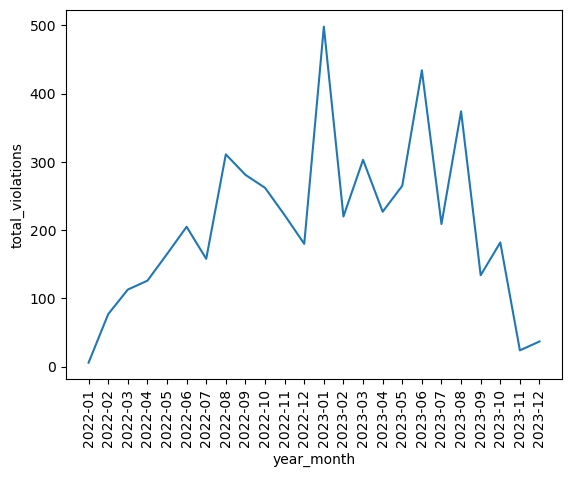

In [42]:
# Plot total violations over time (year_month)
tot_violations_plt = sns.lineplot(x = tot_violations_yrm['year_month'].astype(str), 
             y = tot_violations_yrm['total_violations'], data = tot_violations_yrm) 
tot_violations_plt.tick_params(axis='x', labelrotation=90)

We can see there are certain months/years where the number of violations increased, particularly in January 2023. There also seems to be increases in violations overall for June and August of both 2022 and 2023. However, reasons for why this may be occurring would have be to further explored beyond this dataset and there could be a variety of reasons as to why this may be happening. 

### Total Violations over time by Top Violation Type 

In [43]:
# Filter table of violations from 2022-2023 for only top violations previously identified

top_violations_2223_df = violations_2223_df[violations_2223_df['code_description'].isin(top_violations_lst)]
top_violations_2223_df

,case_number,address,parcel,establishment_name,code_number,code_description,case_open_date,case_closed_date,date_cited,date_corrected,code_case_status,geocoded_column,num_days_case_to_close,num_days_to_correct
9,184072,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Chocho's,4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-07-07,2022-09-07,NaT,2022-08-25,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",62,NaN
54,201083,"74 Winthrop St, Cambridge, MA 02138",162-72,Pinocchio's Pizza,6-501.12-.13,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",2022-11-01,2022-11-29,2022-11-01,2022-11-09,Complete,"{'type': 'Point', 'coordinates': [-71.120265, 42.372]}",28,8.0
55,176817,"10 Dewolfe St, Cambridge, MA 02138",132-153,Radcliffe Child Care Center,6-501.111 *,Controlling Pests,2022-05-12,2022-05-23,2022-05-12,2022-05-18,Complete,"{'type': 'Point', 'coordinates': [-71.11629, 42.370599]}",11,6.0
56,182614,"340 River St, Cambridge, MA 02139",128-72,Whole Foods Market,5-205.11,Accessibility- Operation and Maintenance,2022-06-28,2022-07-20,NaT,2022-07-20,Complete,"{'type': 'Point', 'coordinates': [-71.114152, 42.361151]}",22,NaN
57,163297,"1815 Massachusetts Ave, Cambridge, MA 02140",152-17,Porter Café,3-501.16 *,"Potentially Hazardous Food, Hot and Cold Holding",2022-02-16,2022-02-22,2022-02-16,2022-02-22,Complete,"{'type': 'Point', 'coordinates': [-71.118975, 42.387136]}",6,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442,206727,"336 Rindge Ave, Cambridge, MA 02140",268B-15,Ferro's Foodtown,6-501.12-.13,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",2023-01-03,2023-03-07,2023-01-03,2023-01-12,Complete,"{'type': 'Point', 'coordinates': [-71.137421, 42.393743]}",63,9.0
6444,185228,"163 Huron Ave, Cambridge, MA 02138",230-71,Armando’s Pizza,6-501.14,"Cleaning Ventilation System, Nuisance and Discharge Prohibition",2022-07-14,2022-09-30,2022-07-14,2022-08-22,Complete,"{'type': 'Point', 'coordinates': [-71.131365, 42.382327]}",78,39.0
6445,192289,"1200 Cambridge St, Cambridge, MA 02139",84-22,Casa Portugal,6-501.14,"Cleaning Ventilation System, Nuisance and Discharge Prohibition",2022-08-25,2022-10-12,2022-08-25,2022-10-12,Complete,"{'type': 'Point', 'coordinates': [-71.09734, 42.373176]}",48,48.0
6446,197912,"187 Hampshire St, Cambridge, MA 02139",84-12,Beauty's Pizza,?\t4-602.13,Non-Food Contact Surfaces Clean-Frequency,2022-10-05,2022-10-14,2022-10-05,2022-10-13,Complete,"{'type': 'Point', 'coordinates': [-71.099431, 42.372755]}",9,8.0


In [44]:
# Group violations by month-year and take count of total violations
violation_types_yrm = top_violations_2223_df[['code_description','case_open_date']].groupby([top_violations_2223_df.case_open_date.dt.to_period("M"),
                                                                                        top_violations_2223_df.code_description]).agg('count')



# # Format table for visualization
violation_types_yrm.index.names = ['year_month', 'code_description']
violation_types_yrm.columns = ['total_violations', 'total_violations2']

## Drop unecessary count column
violation_types_yrm = violation_types_yrm.drop('total_violations2', axis=1)
# violation_types_yrm.reindex(top_violations_lst.to_list())
violation_types_yrm = violation_types_yrm.reset_index()

violation_types_yrm



,year_month,code_description,total_violations
0,2022-01,Accessibility- Operation and Maintenance,1
1,2022-01,"Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling",1
2,2022-01,Non-Food Contact Surfaces Clean-Frequency,1
3,2022-02,Accessibility- Operation and Maintenance,1
4,2022-02,"Chemical Sanitization – Temperature, pH, Concentration and Hardness",2
...,...,...,...
176,2023-07,"Equipment, Food-Contact Surfaces, and Utensils Clean",6
177,2023-07,Food Storage-Preventing Contamination and Prohibited Areas,14
178,2023-07,"In-Use Utensils, Between-Use Storage",7
179,2023-07,Non-Food Contact Surfaces Clean-Frequency,19


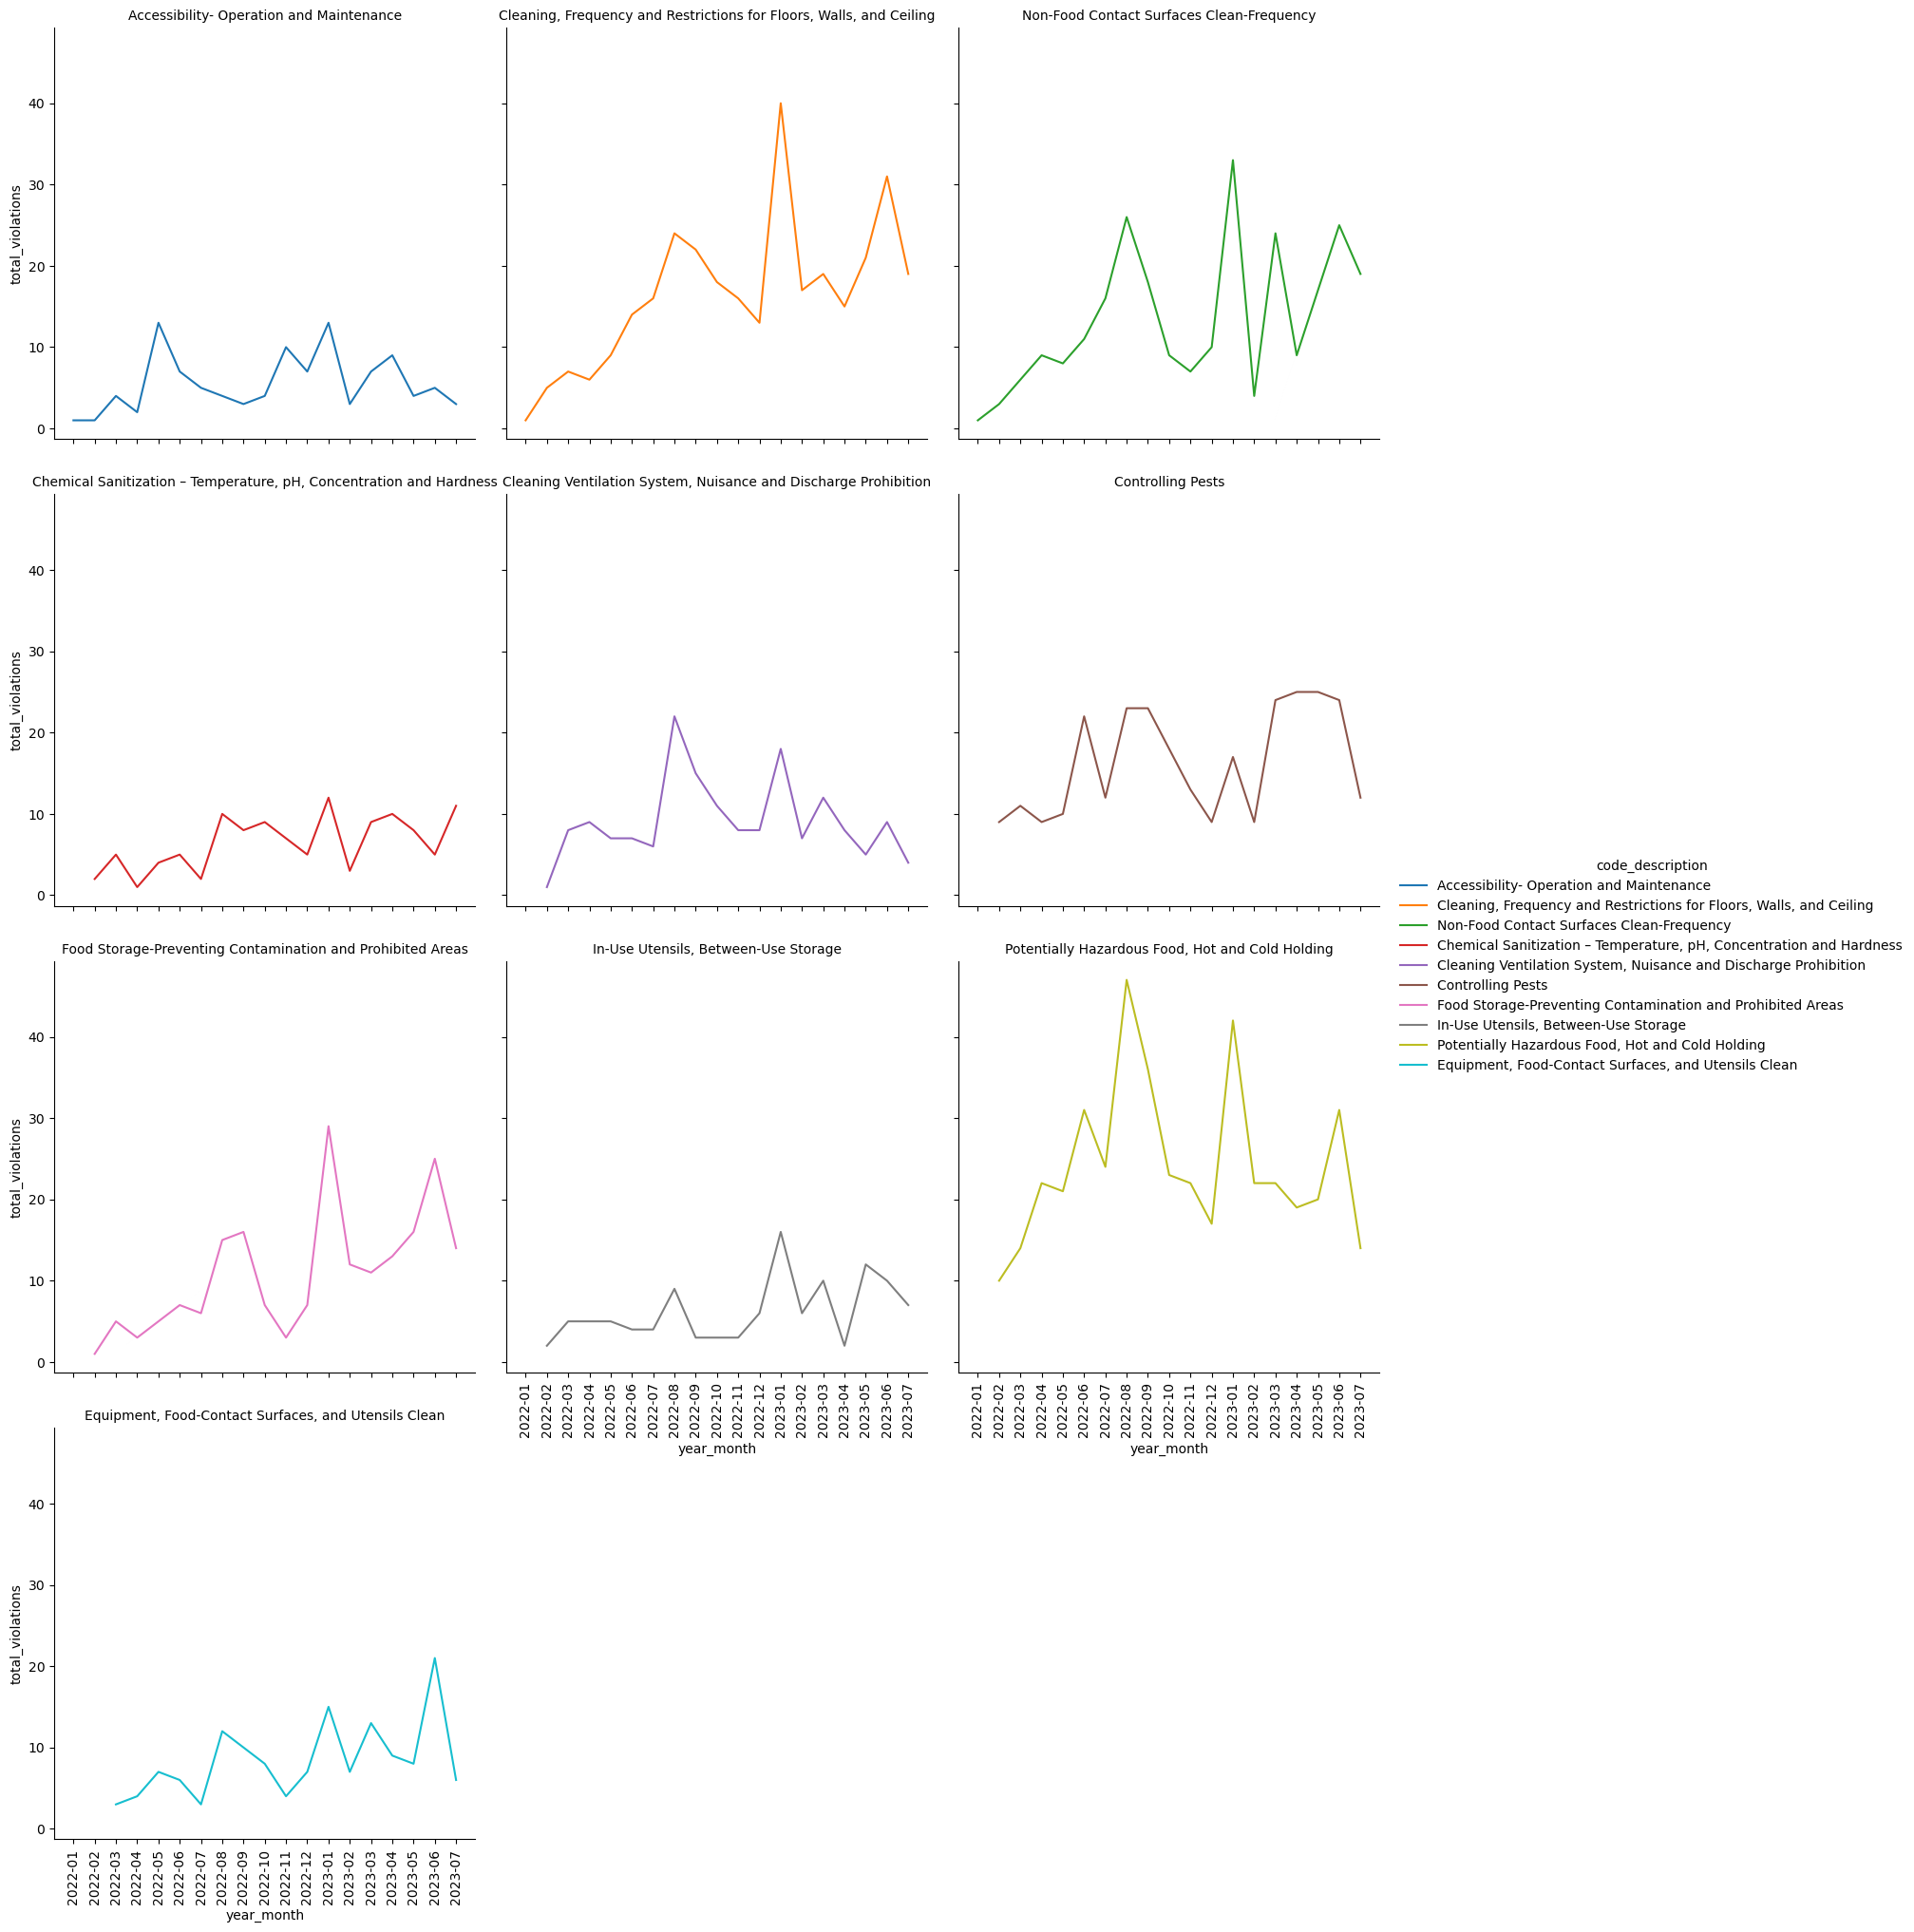

In [45]:
# Plot total top violations over time (year_month) by violation type
# Order by count of top violations
top_violations_plt = sns.relplot(
    data=violation_types_yrm, 
    x = violation_types_yrm['year_month'].astype(str), 
    y = violation_types_yrm['total_violations'], 
    hue = violation_types_yrm['code_description'],                      
    kind='line',
    col='code_description',
    col_wrap=3
)


top_violations_plt.set_titles("{col_name}")
top_violations_plt.tick_params(axis='x', labelrotation=90)

In [46]:
# Recall the top violations
top_violations_lst

0                       Potentially Hazardous Food, Hot and Cold Holding
1    Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling
2                                                      Controlling Pests
3                              Non-Food Contact Surfaces Clean-Frequency
4             Food Storage-Preventing Contamination and Prohibited Areas
5        Cleaning Ventilation System, Nuisance and Discharge Prohibition
6                   Equipment, Food-Contact Surfaces, and Utensils Clean
7    Chemical Sanitization – Temperature, pH, Concentration and Hardness
8                                   In-Use Utensils, Between-Use Storage
9                               Accessibility- Operation and Maintenance
Name: code_description, dtype: object

When looking at the violations by type, we see that most violation types follow a similar pattern to the overall violations, where there was a spike in violations in January 2023 and an increase in violations in June and August for both 2022 and 2023. Ultimately, it's difficult to gain any additional insights from looking at the violation trends by violation type.

## 4. Summary and Recommendations <a id='step_4'></a>

### Summary of findings: 
- Among all of the inspections in the dataset that occurred between May 2021 and March 2024, ~45% of the inspection cases were violation cases. 
- The average number of days it takes for a violation (case) to be corrected is ~21 days or about three weeks and the number of days for a case to be closed is ~38 days or about a month. The range in days may be attributed to the severity of the citation, the number of citations a given case has, and/or when an inspector comes to the restaurant.Case corrections can take anywhere between 1 day to almost a year.
- The top 3 violations (violations that occurred >100 times) include:  
    - Potentially Hazardous Food, Hot and Cold Holding (e.g. controlling the time/temperature of food)
    - Cleaning, Frequency and Restrictions for Floors, Walls, and Ceiling ( e.g. frequency of maintenance cleaning)
    - Controlling Pests - (e.g. in relation to shipments received, physical food establishment facility, and using prevention methods)
- Among all top violations (violations that occurred >100 times), it took 13-30 days to correct or anywhere between 2 weeks to a month. Based on what we can infer, the scale and severity of the violation correlated with the amount of time it takes to correct the issue
- When looking at violations that occurred between 2022 and 2023, certain months/years where the number of violations increased, particularly in January 2023, as well as June and August of both 2022 and 2023. Reasons for why this may be occurring would have be to further explored beyond this dataset and there could be a variety of reasons as to why this may be happening.

### Recommendations
- Investment in education around controlling food temperature and cleaning practices/expectations 
- Collaboration with other municipal services for pest control 
- Investigating why some violations take longer than others to resolve to understand challenges that prevent faster corrections 
- Support for establishments where multiple violations have occurred

## 5. Tableau Dashboard <a id='step_5'></a>

In order to allow people to inspect the sanitary inspection violation data themselves, a Tableau dashboard has been created:

https://public.tableau.com/views/CambridgeSanitaryInspections2021-2024/CambridgeSanitaryInspections2021-2024?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link